In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

business = pd.read_csv('average_business_scores.csv') 
business.head() 

,business_id,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,polarity_alternate_measure,avg_usefulness_review_rating,avg_funniness_review_rating,avg_coolness_review_rating
0,iCQpiavjjPzJ5_3gPD5Ebg,0.754110,2.720736,0.602945,0.582331,2.522209,0.867730,1.096687,2.991411,2.300613,4.446135,2.695350,1.468221,0.937669,1.075583
1,pomGBqfbxcqPv14c3XH-ZQ,0.654222,2.138667,0.592889,0.655111,3.115556,0.740444,1.024000,3.023111,1.636444,4.806222,3.119600,0.680000,0.225778,0.316444
2,jtQARsP6P-LbkyjbO1qNGg,1.060870,2.547826,0.921739,0.991304,3.434783,1.313043,1.443478,3.443478,2.434783,5.834783,3.223478,1.043478,0.382609,0.278261
3,elqbBhBfElMNSrjFqW3now,0.552413,2.113145,0.540765,0.728785,3.314476,0.652246,1.014975,3.276206,1.379368,5.732113,3.451747,0.602329,0.236273,0.357737
4,Ums3gaP2qM3W1XcA5r6SsQ,1.012448,2.282158,0.659751,0.883817,3.037344,0.759336,1.132780,2.887967,2.095436,4.887967,3.231950,0.771784,0.327801,0.481328


In [3]:
# Assign the data to X and y

X = business[["positive", "negative", "surprise", "joy", "fear", "disgust", "anger", "avg_funniness_review_rating", 
              "avg_coolness_review_rating" ]]
y = business["avg_usefulness_review_rating"].values.reshape(-1, 1)
print(X.shape, y.shape) 

(188593, 9) (188593, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [5]:
# Fit the model to the training data and calculate the scores for the training and testing data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}") 

Training Score: 0.4214902966892735
Testing Score: 0.36546525525268025


In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

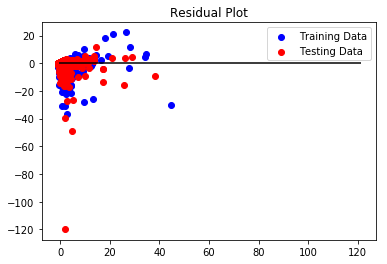

In [8]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [9]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}") 

MSE: 1.3781427268055415, R2: 0.36546525525268025


In [10]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}") 

MSE: 0.9274032664655859, R2: 0.3638021103699024


In [11]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}") 

MSE: 0.9249788552928532, R2: 0.365465254470706


In [12]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet


elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")  

MSE: 0.9260383305798076, R2: 0.36473845528199456


In [13]:
from sklearn import tree
import pandas as pd
import os

In [14]:
business_data = pd.read_csv("business_data.csv")
business_data.head()

,business_id,city,stars
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,4.0
1,AjEbIBw6ZFfln7ePHha9PA,Henderson,4.5
2,O8S5hYJ1SMc8fA4QBtVujA,Montréal,4.0
3,bFzdJJ3wp3PZssNEsyU23g,Phoenix,1.5
4,8USyCYqpScwiNEb58Bt6CA,Calgary,2.0


In [15]:
df = merge_table = pd.merge(business_data, business, on="business_id")
df.head()

,business_id,city,stars,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,polarity_alternate_measure,avg_usefulness_review_rating,avg_funniness_review_rating,avg_coolness_review_rating
0,Apn5Q_b6Nz61Tq4XzPdf9A,Calgary,4.0,0.541667,2.291667,0.375000,0.458333,3.125000,0.875000,1.375000,3.333333,1.75,6.083333,3.935417,0.541667,0.250,0.208333
1,AjEbIBw6ZFfln7ePHha9PA,Henderson,4.5,0.666667,1.666667,0.333333,0.000000,2.666667,0.333333,0.333333,2.333333,1.00,5.666667,6.000000,0.333333,0.000,0.333333
2,O8S5hYJ1SMc8fA4QBtVujA,Montréal,4.0,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.800000,0.40,0.600000,0.600000,0.200000,0.000,0.400000
3,bFzdJJ3wp3PZssNEsyU23g,Phoenix,1.5,1.750000,2.000000,1.000000,1.250000,1.000000,1.750000,1.125000,2.375000,4.00,3.500000,0.581250,0.375000,0.125,0.000000
4,8USyCYqpScwiNEb58Bt6CA,Calgary,2.0,1.000000,2.000000,0.750000,0.750000,1.250000,1.250000,1.000000,2.000000,2.25,4.000000,2.475000,1.000000,0.000,0.000000


In [16]:
df = df.drop(["business_id", "city", "polarity_alternate_measure", "avg_usefulness_review_rating", "avg_funniness_review_rating",
             "avg_coolness_review_rating"], axis = 1)
df.head()

,stars,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,4.0,0.541667,2.291667,0.375000,0.458333,3.125000,0.875000,1.375000,3.333333,1.75,6.083333
1,4.5,0.666667,1.666667,0.333333,0.000000,2.666667,0.333333,0.333333,2.333333,1.00,5.666667
2,4.0,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.800000,0.40,0.600000
3,1.5,1.750000,2.000000,1.000000,1.250000,1.000000,1.750000,1.125000,2.375000,4.00,3.500000
4,2.0,1.000000,2.000000,0.750000,0.750000,1.250000,1.250000,1.000000,2.000000,2.25,4.000000


In [17]:
for index, row in df.iterrows():
    if (row["stars"] > 3):
        row["stars"] = 1
    else:
        row["stars"] = 0

df.head()

,stars,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,1.0,0.541667,2.291667,0.375000,0.458333,3.125000,0.875000,1.375000,3.333333,1.75,6.083333
1,1.0,0.666667,1.666667,0.333333,0.000000,2.666667,0.333333,0.333333,2.333333,1.00,5.666667
2,1.0,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.800000,0.40,0.600000
3,0.0,1.750000,2.000000,1.000000,1.250000,1.000000,1.750000,1.125000,2.375000,4.00,3.500000
4,0.0,1.000000,2.000000,0.750000,0.750000,1.250000,1.250000,1.000000,2.000000,2.25,4.000000


In [18]:
target = df["stars"]
target_names = ["negative", "positive"]

In [19]:
data = df
data = df.drop("stars", axis=1)
feature_names = data.columns
data.head() 

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0.541667,2.291667,0.375000,0.458333,3.125000,0.875000,1.375000,3.333333,1.75,6.083333
1,0.666667,1.666667,0.333333,0.000000,2.666667,0.333333,0.333333,2.333333,1.00,5.666667
2,0.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.800000,0.40,0.600000
3,1.750000,2.000000,1.000000,1.250000,1.000000,1.750000,1.125000,2.375000,4.00,3.500000
4,1.000000,2.000000,0.750000,0.750000,1.250000,1.250000,1.000000,2.000000,2.25,4.000000


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) 

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train.astype('int'))
clf.score(X_test, y_test.astype('int')) 

0.71816463309847056

In [ ]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train.astype('int'))
rf.score(X_test, y_test.astype('int')) 

0.51123474823852899

In [21]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)  

[(0.1179279568578783, 'negative'),
 (0.11233011836405064, 'disgust'),
 (0.11087521825390632, 'joy'),
 (0.10714658171047058, 'positive'),
 (0.10107414592300434, 'trust'),
 (0.094093830816895249, 'anticipation'),
 (0.091785705218280056, 'anger'),
 (0.089018830451906339, 'sadness'),
 (0.089000616636251861, 'fear'),
 (0.086746995767356144, 'surprise')]